In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st


## PART 1

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

From above we understand that only our Target variable i.e. Outcome is Categorical, remaining all are continuous variables

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
df.Outcome.value_counts(1)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

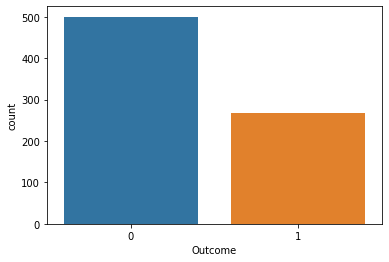

In [9]:
sns.countplot(df['Outcome'])

There are 65 % of '0's and 35% of '1's. Thus, we dont have to worry about the data imbalance and we can proceed

In [10]:
df.isnull().sum()[df.isnull().sum()!=0]

Series([], dtype: int64)

There are no null values. 

In [11]:
for i in list(df.columns):
    print(i)
    print(df[df[i]==0].shape[0])

Pregnancies
111
Glucose
5
BloodPressure
35
SkinThickness
227
Insulin
374
BMI
11
DiabetesPedigreeFunction
0
Age
0
Outcome
500


We see that there values = 0 in many features. We need to impute these values before proceeding. We shall impute the 0 values in Glucose,Blood Pressure, SkinThickness, Insulin, BMI.Before imputing let us check the distribution of each feature and also find the median and mean values

Pregnancies


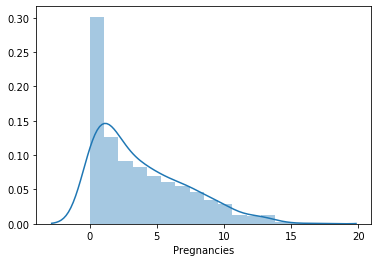

Glucose


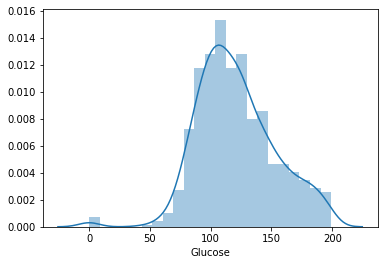

BloodPressure


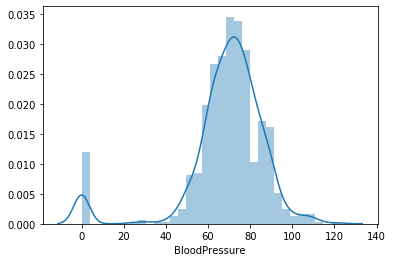

SkinThickness


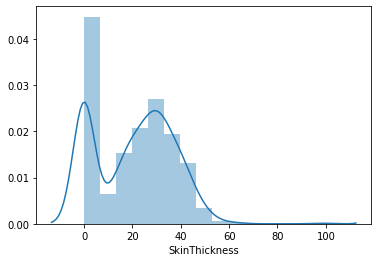

Insulin


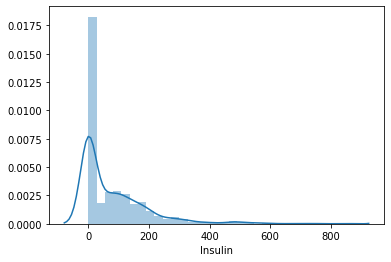

BMI


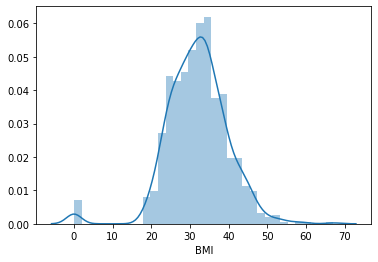

DiabetesPedigreeFunction


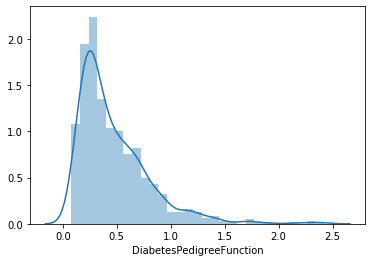

Age


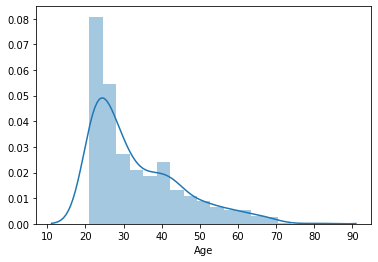

Outcome


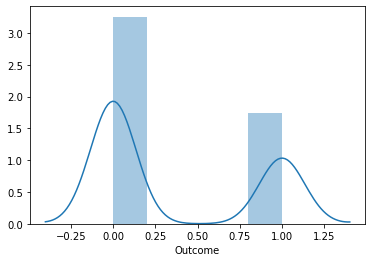

In [12]:
for i in list(df.columns):
    print(i)
    sns.distplot(df[i])
    plt.show()

In [13]:
for i in list(df.columns):
    print(i)
    print(df[i].mean(),df[i].median())
    

Pregnancies
3.8450520833333335 3.0
Glucose
120.89453125 117.0
BloodPressure
69.10546875 72.0
SkinThickness
20.536458333333332 23.0
Insulin
79.79947916666667 30.5
BMI
31.992578124999977 32.0
DiabetesPedigreeFunction
0.4718763020833327 0.3725
Age
33.240885416666664 29.0
Outcome
0.3489583333333333 0.0


Looking at the distribution and the means and medians, we go ahead with imputing the 0 values with medians

In [14]:
lst=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in lst:
    df[col].replace(0,df[col].median(),inplace=True)

In [15]:
for i in list(df.columns):
    print(i)
    print(df[df[i]==0].shape[0])

Pregnancies
111
Glucose
0
BloodPressure
0
SkinThickness
0
Insulin
0
BMI
0
DiabetesPedigreeFunction
0
Age
0
Outcome
500


Thus ,we have replaced the 0 values now

Now we check the outliers in the data by plotting the box plot

Pregnancies


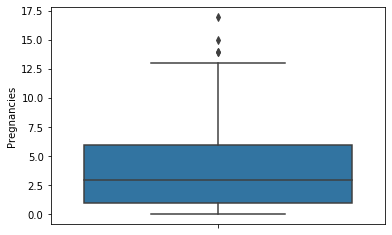

Glucose


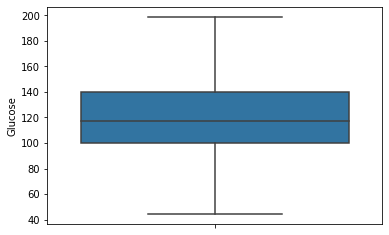

BloodPressure


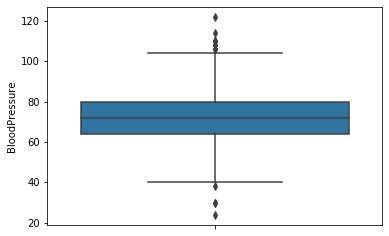

SkinThickness


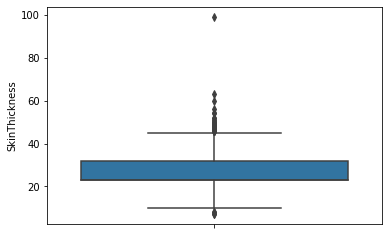

Insulin


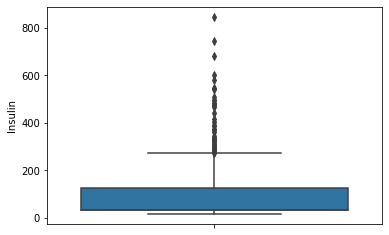

BMI


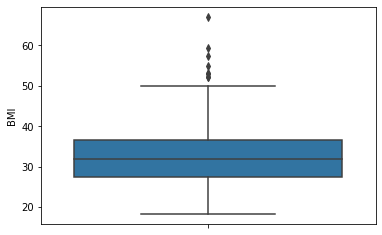

DiabetesPedigreeFunction


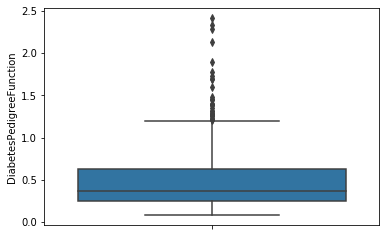

Age


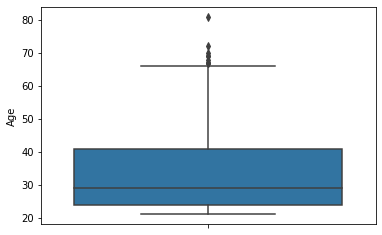

In [16]:
for col in list(df.columns)[0:-1]:
    print(col)
    sns.boxplot(y=df[col])
    plt.show()

We see that there are outliers in every feature except Glucose

We find the skewness of the data

In [17]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.535587
BloodPressure               0.141885
SkinThickness               1.223057
Insulin                     2.693181
BMI                         0.601059
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

The data is highly skewed and hence we can reduce the skewness by using the boxcox and check the skewness again

In [18]:
lst1=[] 
for col in df.columns: 
    if((df[col].skew()<0.1) or (df[col].skew()>0.2) and (col!='Outcome')): 
        lst1.append(col)

In [19]:
lst1

['Pregnancies',
 'Glucose',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [20]:
for col in df.columns:
    if col in lst1: 
        df[col]=list(st.boxcox(df[col]+1)[0]) 
df.skew()

Pregnancies                -0.044644
Glucose                    -0.001560
BloodPressure               0.141885
SkinThickness               0.015171
Insulin                     0.285163
BMI                        -0.000340
DiabetesPedigreeFunction    0.142321
Age                         0.150219
Outcome                     0.635017
dtype: float64

We can further reduce the skewness of the data by applying transformations

In [21]:
df['Insulin']=df['Insulin'].apply(lambda x: x**-5)

In [22]:
df.skew()

Pregnancies                -0.044644
Glucose                    -0.001560
BloodPressure               0.141885
SkinThickness               0.015171
Insulin                    -0.067835
BMI                        -0.000340
DiabetesPedigreeFunction    0.142321
Age                         0.150219
Outcome                     0.635017
dtype: float64

As the skewness decreases, the distribution approaches normal

Pregnancies


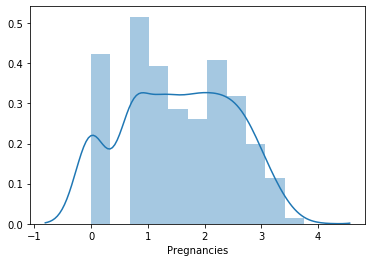

Glucose


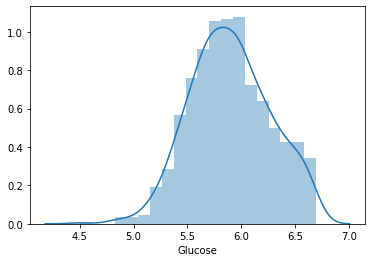

BloodPressure


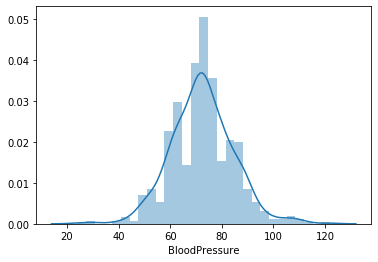

SkinThickness


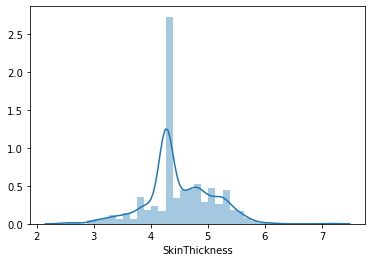

Insulin


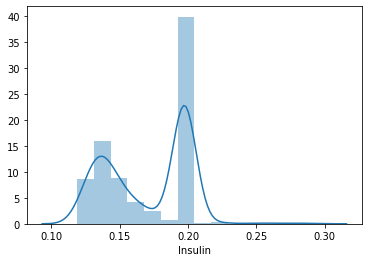

BMI


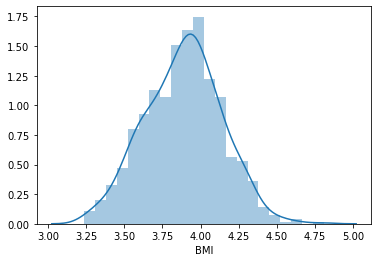

DiabetesPedigreeFunction


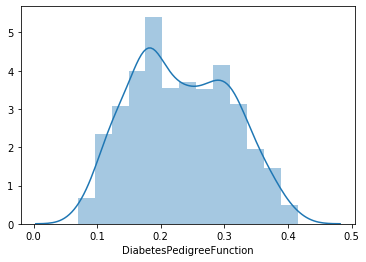

Age


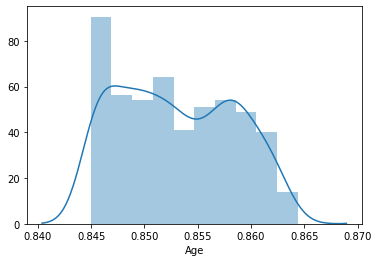

Outcome


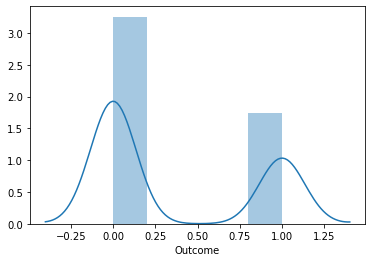

In [23]:
for i in list(df.columns):
    print(i)
    sns.distplot(df[i])
    plt.show()

Now we treat the outliers with the Z score

In [24]:
z=st.zscore(df)
df=df[(abs(z)<3).all(axis=1)]

In [25]:
df.shape

(751, 9)

We thus have removed only 2% of the data by removing the outliers

## PART 2

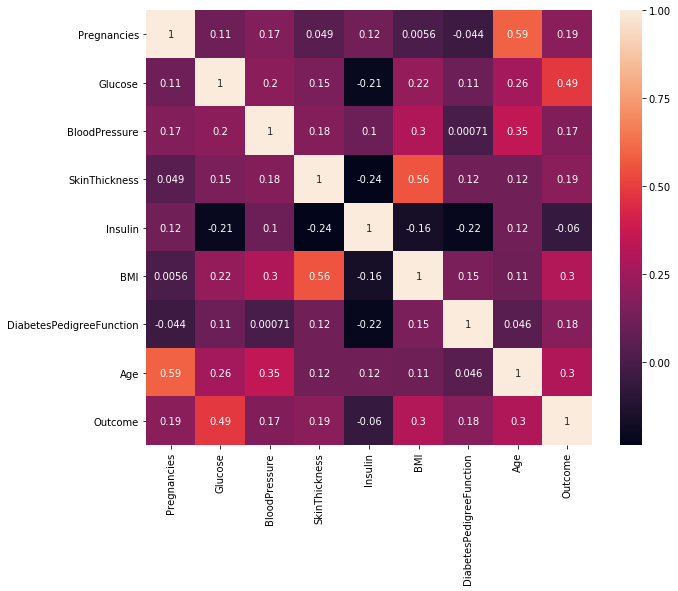

In [26]:
plt.figure(figsize=[10,8])
ax=sns.heatmap(df.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

From above heatmap we see that
1. Glucose highly correlated with the outcome followed by age and BMI
2. Insulin is least correlated with the outcome.
3. Skinthickness and BMI are correlated and also age and pregnancies are correlated


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


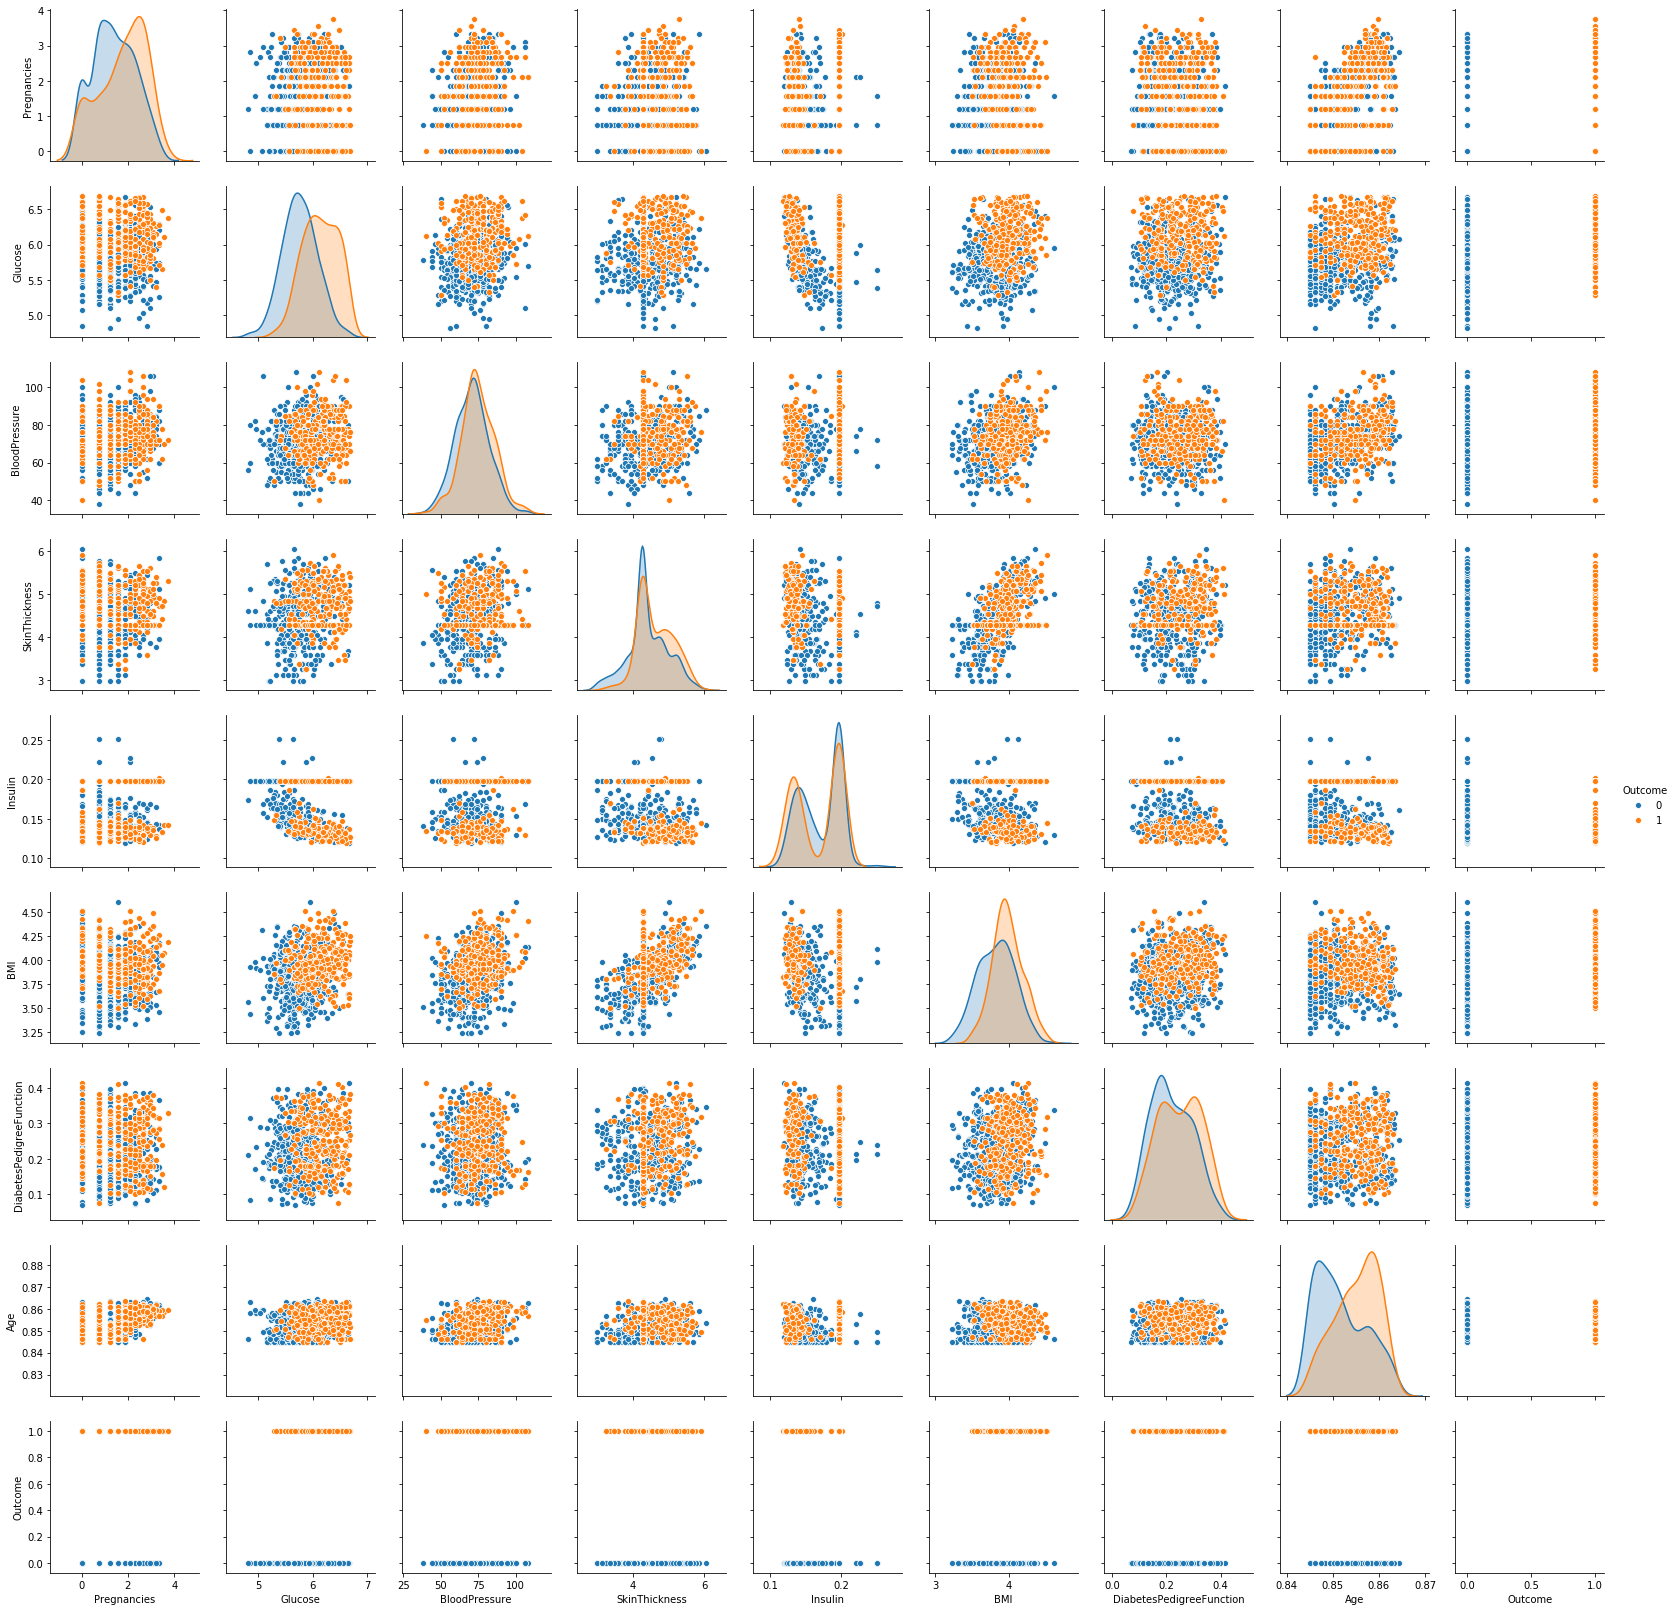

In [27]:
sns.pairplot(df,hue='Outcome')

From the correlation and pairplot we cannot directly go ahead with excluding any of the columns. For that we need to find the significance of the variables by applying independent t test and also the multicollinearity

#H0:mu(outcome=1)=mu(outcome=0)
#H1:mu(outcome=1)!=mu(outcome=0)
#alpha=0.05

In [28]:
for col in list(df.columns)[0:-1]:
    pvalue=st.ttest_ind(df[df['Outcome']==0][col],df[df['Outcome']==1][col])[1]
    if pvalue<0.05:
        print(col)

Pregnancies
Glucose
BloodPressure
SkinThickness
BMI
DiabetesPedigreeFunction
Age


As their pvalues<0.05, Thus we reject the null hypothesis and hence we have enough evidence to say that their means are not equal and thus above features are significant 

Now we split the data in X,y and apply Logit and then check the multicollinearity

In [29]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [30]:
import statsmodels.api as sm
Xc=sm.add_constant(X)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(Xc.values,i) for i in range(Xc.shape[1])]
pd.DataFrame({'VIF':vif[1:]},index=X.columns)

,VIF
Pregnancies,1.563815
Glucose,1.195935
BloodPressure,1.271764
SkinThickness,1.517536
Insulin,1.211695
BMI,1.596674
DiabetesPedigreeFunction,1.075317
Age,1.820960


From VIF we find that all the vif values are less than 2 and hence we can consider all the variables.

Thus, from VIF, test of significance and the correlation matrix we can go ahead and drop the Insulin feature and proceed ahead with the model building

In [32]:
X=X.drop('Insulin',axis=1)

In [33]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

Splitting the data in test and train

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Checking if the above data sets are representation of the df dataset

#H0:mu(original_dataset)=mu(split_dataset)
#H1:mu(original_dataset)!=mu(split_dataset)
#alpha=0.05

In [36]:
st.ttest_ind(X,X_train)[1]

array([0.82664308, 0.8565558 , 0.42969627, 0.68992524, 0.86228722,
       0.41253   , 0.84100676])

In [37]:
st.ttest_ind(X,X_test)[1]

array([0.70712668, 0.75558564, 0.17046942, 0.48483612, 0.75895986,
       0.15991605, 0.72478461])

In [38]:
st.ttest_ind(y,y_train)[1]

0.8583976788869644

In [39]:
st.ttest_ind(y,y_test)[1]

0.7553125945434752

Thus in all the cases the pvalue>0.05. Hence we fail to reject the null hypothesis and have enough evidence to say that the splits are the representation of the original dataset

Scaling the data:

In [40]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_trains=ss.fit_transform(X_train)
X_tests=ss.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear',random_state=0)
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()


In [42]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score

In [43]:
def model_eval(algo,Xtrain,ytrain,Xtest,ytest):
    algo.fit(Xtrain,ytrain)
    
    y_train_pred=algo.predict(Xtrain)
    y_train_prob=algo.predict_proba(Xtrain)[:,1]
    
    y_test_pred=algo.predict(Xtest)
    y_test_prob=algo.predict_proba(Xtest)[:,1]

    #print('Confusion Matrix - Train: ','\n',confusion_matrix(ytrain,y_train_pred))
    print('Accuracy Score - Train: ',accuracy_score(ytrain,y_train_pred))
    print('Classification Report - Train: ','\n',classification_report(ytrain,y_train_pred))
    print('AUC Score - Train: ',roc_auc_score(ytrain,y_train_prob))
    
    print('\n')

    #print('Confusion Matrix - Test: ','\n',confusion_matrix(ytest,y_test_pred))
    print('Accuracy Score - Test: ',accuracy_score(ytest,y_test_pred))
    print('Classification Report - Test: ','\n',classification_report(ytest,y_test_pred))
    print('AUC Score - Test: ',roc_auc_score(ytest,y_test_prob))
    
    print('\n')
    

## Logistic Regression

In [44]:
model_eval(lr,X_train,y_train,X_test,y_test)

Accuracy Score - Train:  0.7142857142857143
Classification Report - Train:  
               precision    recall  f1-score   support

           0       0.71      0.94      0.81       340
           1       0.74      0.29      0.42       185

    accuracy                           0.71       525
   macro avg       0.72      0.62      0.61       525
weighted avg       0.72      0.71      0.67       525

AUC Score - Train:  0.7810810810810811


Accuracy Score - Test:  0.7035398230088495
Classification Report - Test:  
               precision    recall  f1-score   support

           0       0.72      0.91      0.80       150
           1       0.63      0.29      0.40        76

    accuracy                           0.70       226
   macro avg       0.67      0.60      0.60       226
weighted avg       0.69      0.70      0.67       226

AUC Score - Test:  0.7778070175438596




## Decision Tree

In [45]:
model_eval(dtc,X_train,y_train,X_test,y_test)

Accuracy Score - Train:  1.0
Classification Report - Train:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       340
           1       1.00      1.00      1.00       185

    accuracy                           1.00       525
   macro avg       1.00      1.00      1.00       525
weighted avg       1.00      1.00      1.00       525

AUC Score - Train:  1.0


Accuracy Score - Test:  0.6946902654867256
Classification Report - Test:  
               precision    recall  f1-score   support

           0       0.80      0.72      0.76       150
           1       0.54      0.64      0.59        76

    accuracy                           0.69       226
   macro avg       0.67      0.68      0.67       226
weighted avg       0.71      0.69      0.70       226

AUC Score - Test:  0.6823684210526316




## RandomForestClassifier

In [46]:
model_eval(rfc,X_train,y_train,X_test,y_test)

Accuracy Score - Train:  1.0
Classification Report - Train:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       340
           1       1.00      1.00      1.00       185

    accuracy                           1.00       525
   macro avg       1.00      1.00      1.00       525
weighted avg       1.00      1.00      1.00       525

AUC Score - Train:  1.0


Accuracy Score - Test:  0.7389380530973452
Classification Report - Test:  
               precision    recall  f1-score   support

           0       0.81      0.80      0.80       150
           1       0.61      0.62      0.61        76

    accuracy                           0.74       226
   macro avg       0.71      0.71      0.71       226
weighted avg       0.74      0.74      0.74       226

AUC Score - Test:  0.8087719298245615




## KNN

In [47]:
model_eval(knn,X_trains,y_train,X_tests,y_test)

Accuracy Score - Train:  0.8495238095238096
Classification Report - Train:  
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       340
           1       0.81      0.75      0.78       185

    accuracy                           0.85       525
   macro avg       0.84      0.83      0.83       525
weighted avg       0.85      0.85      0.85       525

AUC Score - Train:  0.9136883942766296


Accuracy Score - Test:  0.7168141592920354
Classification Report - Test:  
               precision    recall  f1-score   support

           0       0.80      0.76      0.78       150
           1       0.57      0.63      0.60        76

    accuracy                           0.72       226
   macro avg       0.69      0.70      0.69       226
weighted avg       0.73      0.72      0.72       226

AUC Score - Test:  0.7510526315789473




After fitting the base model, following are the observations
1. The test accuracy is highest in Random Forest Classifier which is 75% but the model is overfitting as the train accuracy is 100%
2. The highest weighted avg F1 score is given by KNN and also the model accuracy is 71% and the train accuracy is 84% hence less overfitting.
3. The precision for knn is 0.73,rfc is 0.74, dtc is 0.73 and lr is 0.69. Thus, RFC performs good
4. The recall for knn is 0.72,rfc is 0.74, dtc is 0.71 and lr is 0.70.Thus, RFC performs good.

Thus, considering above findings I would proceed with the Random Forest Classifier.

To improve the accuracy further we shall do the hyperparameter tuning using Randomized  Search CV by using ACCURACY as scoring technique

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
rfc=RandomForestClassifier()

params={
    'n_estimators':sp_randint(50,250),
    'max_depth':sp_randint(2,10),
    'min_samples_split':sp_randint(2,20),
    'min_samples_leaf':sp_randint(1,30),
    'max_features':sp_randint(2,7),
    'criterion':['gini','entropy']}

rsearch=RandomizedSearchCV(rfc,param_distributions=params,n_iter=200,scoring='accuracy',n_jobs=-1,random_state=3)
rsearch.fit(X,y)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [55]:
rsearch.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 6,
 'min_samples_leaf': 12,
 'min_samples_split': 9,
 'n_estimators': 107}

In [56]:
rfc=RandomForestClassifier(**rsearch.best_params_)


In [57]:
model_eval(rfc,X_train,y_train,X_test,y_test)

Accuracy Score - Train:  0.84
Classification Report - Train:  
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       340
           1       0.79      0.74      0.77       185

    accuracy                           0.84       525
   macro avg       0.83      0.82      0.82       525
weighted avg       0.84      0.84      0.84       525

AUC Score - Train:  0.9209538950715421


Accuracy Score - Test:  0.7743362831858407
Classification Report - Test:  
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       150
           1       0.68      0.63      0.65        76

    accuracy                           0.77       226
   macro avg       0.75      0.74      0.74       226
weighted avg       0.77      0.77      0.77       226

AUC Score - Test:  0.8457894736842104




The accuracy has improved by 3% and also reduces the overfitting. We further tune it using grid search and fine tuning it

In [58]:
from sklearn.model_selection import GridSearchCV
params={
    'n_estimators':np.arange(75,100),
    'max_depth':[6,7,8,9,10],
    'min_samples_split':np.arange(4,10),
    'min_samples_leaf':np.arange(3,15),
    'max_features':[3,4,5,6],
    'criterion':['gini','entropy']}



In [ ]:
gsearch=GridSearchCV(rfc,param_grid=params,scoring='accuracy',n_jobs=-1)
gsearch.fit(X,y)

In [ ]:
gsearch.best_params_

In [ ]:
rfc=RandomForestClassifier(**gsearch.best_params_)

In [ ]:
model_eval(rfc,X_train,y_train,X_test,y_test)

Thus above is the final model whose test accuracy is and weighted  avg of F1 is 

Applying OLS

In [60]:
model=sm.Logit(y,Xc).fit()
model.summary()


Optimization terminated successfully.
         Current function value: 0.455371
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  751
Model:                          Logit   Df Residuals:                      742
Method:                           MLE   Df Model:                            8
Date:                Wed, 04 Mar 2020   Pseudo R-squ.:                  0.2950
Time:                        11:59:28   Log-Likelihood:                -341.98
converged:                       True   LL-Null:                       -485.08
Covariance Type:            nonrobust   LLR p-value:                 3.574e-57
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -95.3360     19.805     -4.814      0.000    -134.154     -56.518
Pregnancies                  0.2342      0.122      1.923      0.054      -0.004       0.473
Glucose                      3.2358      0.325      9.957      0.000       2.599       3.873
BloodPressure               -0.0126      0.009     -1.346      0.178      -0.031       0.006
SkinThickness                0.0790      0.216      0.365      0.715      -0.345       0.503
Insulin                      6.5540      3.453      1.898      0.058      -0.215      13.323
BMI                          2.6951      0.522      5.162      0.000       1.672       3.718
DiabetesPedigreeFunction     4.5563      1.275      3.573      0.000       2.057       7.056
Age                         73.6626     23.438      3.143      0.002      27.726     119.600
============================================================================================
"""

In [61]:
pd.DataFrame({'params':model.params,'exp_param':np.exp(model.params)}) 

,params,exp_param
const,-95.335992,3.945523e-42
Pregnancies,0.234245,1.263955e+00
Glucose,3.235752,2.542550e+01
BloodPressure,-0.012572,9.875063e-01
SkinThickness,0.079016,1.082221e+00
Insulin,6.553980,7.020330e+02
BMI,2.695082,1.480674e+01
DiabetesPedigreeFunction,4.556263,9.522694e+01
Age,73.662575,9.800533e+31


1. Pregnancies : More the number of pregnancies more are the chances of getting diabetes.Change in Log(odds) i.e. odds of Diabetes with unit change in Pregnancies is 0.23.Odds of getting Diabetes will increase by 26% with unit change in Pregnancies 
2. Glucose :More the glucose more are the chances of getting diabetes.Change in Log(odds) i.e. odds of Diabetes with unit change in glucose is 3.23.Odds of getting Diabetes will increase by 154% with unit change in glucose
3. BMI : More the BMI more are the chances of getting diabetes.Change in Log(odds) i.e. odds of Diabetes with unit change in BMI is 2.6.Odds of getting Diabetes will increase by 138% with unit change in BMI.

Similarly we can interpret for other variables also